In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib_map_utils as mapu # for North Ar
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
from matplotlib_scalebar.scalebar import ScaleBar
import rasterio as rs

Setting the working Directory

Loading Data

Extracting Lat Lons

In [76]:
# Set the working directory
path = "D:\\Fall2024\GIS\\FinalProject"
os.chdir(path)

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("Trimble_Final_Data.csv", low_memory=False)

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\User\AppData\Local\Temp\ipykernel_29056\2522591919.py:2: SyntaxWarning: invalid escape sequence '\G'
  path = "D:\\Fall2024\GIS\\FinalProject"


In [77]:
df.head(10)

,Img_Label,X,Y,Z,Hor_Accuracy,Ver_Accuracy,Remarks
0,A,396103.8633,3323564.158,4.425630,0.10,0.10,Concrete Top Left
1,B,396136.7596,3323564.703,4.492191,0.10,0.10,Concrete Top Right
2,C,396136.4109,3323541.640,5.300878,0.23,0.22,Concrete Bottom Right
3,D,396103.5592,3323540.882,4.571488,0.13,0.15,Concrete Bottom Left
4,F1,396123.5924,3323552.059,4.698696,0.10,0.10,Field Point 1
5,F2,396133.8301,3323548.847,4.577380,0.13,0.08,Field Point 2
6,F3,396143.1803,3323541.515,4.405187,0.10,0.10,Field Point 3
7,F4,396151.3444,3323540.109,4.366974,0.10,0.10,Field Point 4
8,F5,396125.8198,3323541.306,4.482209,0.16,0.23,Field Point 5
9,F6,396107.4443,3323552.295,4.620842,0.10,0.10,Field Point 6


In [78]:
# Extract Latitude, Longitude and z values for As from CSV file
x = np.array(df['X'].values)
y = np.array(df['Y'].values)
z = np.array(df['Z'].values)

 Fitting a linear plane Global for the dataset.

 
 Predict the values using Linear Model.

 
 Calculating the RMSE for the model. 

 

In [79]:
# Prepare the data for linear regression
X = np.column_stack((x, y))

# Fit the linear regression model
model = LinearRegression().fit(X, z)

# Predict the values using the linear model
z_pred_global = model.predict(X)

# Calculate RMSE for the global model
err_global = np.nansum((z - z_pred_global) ** 2)
rmse_global = np.sqrt(err_global / len(z))

print(f"RMSE for the global model is {rmse_global:.4f}")

RMSE for the global model is 0.3197


In [80]:
# The best variogram gives minimum root mean sq. error
models = ['linear', 'power', 'gaussian', 'exponential', 'spherical']
varioerr = []
for m in models:
    ok = OrdinaryKriging(x, y, z, variogram_model=m, verbose=False, enable_plotting=False)
    Aspred,ss = ok.execute("grid", x, y)
    err = np.nansum((z-Aspred)**2)
    rmse = np.sqrt(err/len(z))
    varioerr.append(rmse)
best_model_index = np.argmin(varioerr)
best_model = models[best_model_index]
print(f"Best variogram model: {best_model}")
print(f"RMSE: {varioerr[best_model_index]}")

Best variogram model: spherical
RMSE: 1.5347280196921604


Plotting bar plot errors for the Variogram Model

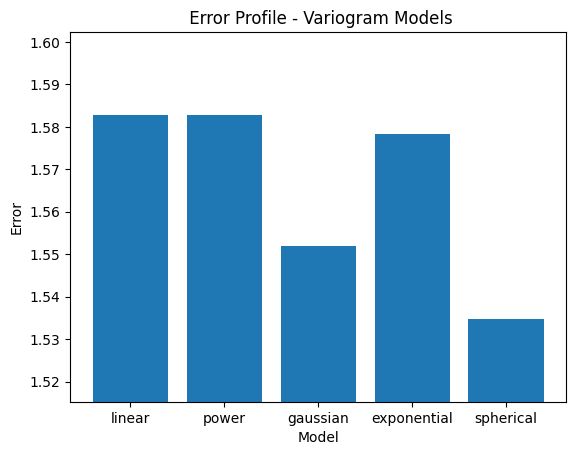

In [81]:
# Plot errors bar
minlim = np.min(varioerr) - np.std(varioerr)
maxlim = np.max(varioerr) + np.std(varioerr)
plt.bar(models,varioerr)
plt.ylim(minlim,maxlim)
plt.ylabel('Error')
plt.xlabel('Model')
plt.title(' Error Profile - Variogram Models')
plt.show()

Indicating New Sampling Area

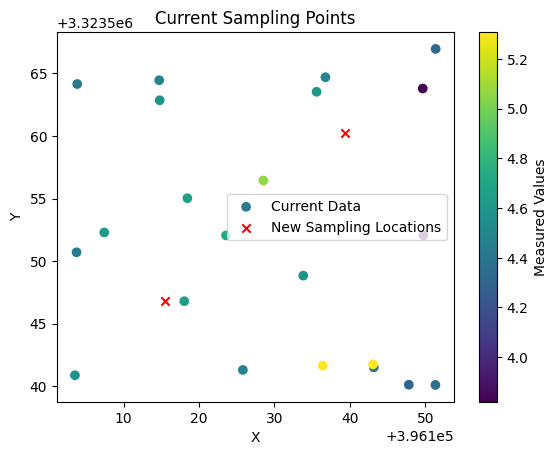

In [82]:
# Plot current data points
plt.scatter(x, y, c=z, cmap='viridis', label='Current Data')
plt.colorbar(label='Measured Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Current Sampling Points')


# Plot new sampling locations
plt.scatter(new_x, new_y, c='red', marker='x', label='New Sampling Locations')
plt.legend()
plt.show()